## Data Cleaning

We will perform an analysis of the features present 

** Basic imports **

In [1]:
%matplotlib inline
import numpy as np
import numpy.random as nd
import pandas as pd
import math
import matplotlib.pyplot as plt

import os
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import display


from collections import Counter


** load data **

Here we are using a small toy dataset to explore the data

In [2]:
inputFile='../../data/smallData/rawData/AcceptedLoans.csv'

data=pd.read_csv(inputFile)

C:\Users\simon\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (5,6,8,9,10,11,12,14,15,16,17,19,20,21,22,23,26,33,35,45,48,52,122,137,138,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


** check the type of the data series**

In [3]:
data.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

Check the type of data

Text(0.5,1,'types encountered in the dataset')

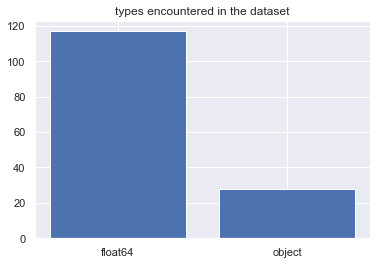

In [4]:
types=data.dtypes

typesSeen=[]
for t in types:
    if not t in typesSeen:
        typesSeen+=[t]

counts=[]
for t in typesSeen:
    counts+= [(types==t).sum()]

plt.bar(range(len(counts)), counts)
plt.xticks(range(len(counts)), typesSeen)
plt.title('types encountered in the dataset')

In [5]:
counts

[117, 28]

## CLEAN THE OBJECT FEATURES

In [13]:
objFeatures=types[types=='object'].keys()

floatType=typesSeen[1]
floatFeatures=types[types=='float64'].keys()



In [17]:
print('object features : {} entries'.format(len(objFeatures)))
print(list(objFeatures))


object features : 28 entries
['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date']


* id

1- Outline

We will proove that `id` is an empty attribute and remove it from the dataset

2- Analysis

In [43]:
vals_id = data['id']
number_of_null_entries = vals_id.isnull().count()
number_of_entries = vals_id.shape[0]

In [46]:
print('{} empty values over {} entries'.format(number_of_null_entries, number_of_entries))
print('ratio {}%'.format(number_of_null_entries/number_of_entries *100))

42538 empty values over 42538 entries
ratio 100.0%


3- Conclusion 

`id` is an empty attribute, we can remove it

In [48]:
data=data.drop('id', axis=1)

- term
It can take either 36 or 60 months. It seems to fit perfectly to a categorical variable, 0 or 1.
0 for 36 months and 1 for 60 months

In [ ]:
def convertTermToInt(x):
    if x == '36 months':
        return(0)
    elif x=='60 months':
        return(1)
    else:
        print('wrong value, ', type(x), x)

In [ ]:
#data.term.apply(convertTermToInt)

In [ ]:
#print(new[new['id'].isnull()].id)
